In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. Global Earthquakes
# 读取数据
earthquakes = pd.read_csv("D:\\usgs_earthquakes.csv")
earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


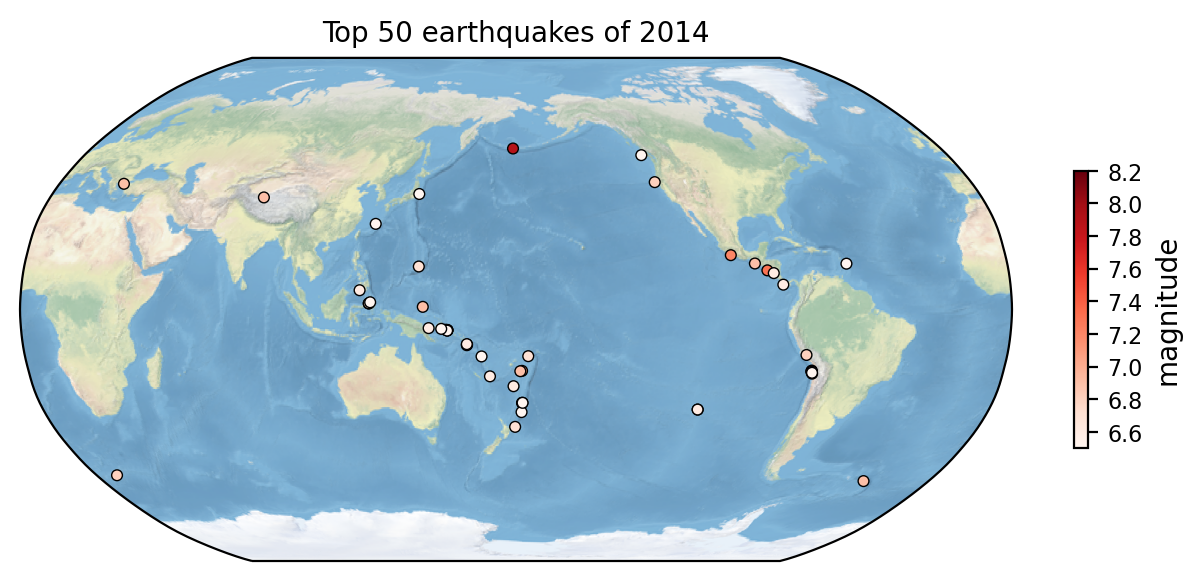

In [3]:
#  1
# 震级前50的地震
earthquakes_top50 = earthquakes.sort_values('mag', ascending=False).head(50)

plt.figure(figsize=(8,6), dpi=200)
# 投影类型Robinson参考：https://scitools.org.uk/cartopy/docs/latest/reference/projections.html
proj=ccrs.Robinson(central_longitude=180,globe=None) 
ax = plt.axes(projection=proj)

# 添加地球背景参照：https://cloud.tencent.com/developer/article/1618341
ax.set_global()
ax.stock_img()
# ax.stock_img()加入投影地图时一直报错：'x' must be finite, check for nan or inf values
# 通过安装pykdtree解决，参考网站：https://github.com/Ouranosinc/pavics-sdi/issues/294

x = earthquakes_top50['longitude']
y = earthquakes_top50['latitude']
# x、y、c分别为经度，纬度和震级
# color bar颜色参考：https://matplotlib.org/stable/gallery/color/colormap_reference.html
plt.scatter(x, y, c = earthquakes_top50['mag'], s=15,
            cmap='Reds', edgecolors='black', linewidths=0.5,
            transform=ccrs.PlateCarree())

# colorbar整体缩小参考：https://www.jianshu.com/p/f786d279c01d
# colorbar上字体大小参考：https://geek-docs.com/matplotlib/matplotlib-ask-answer/444_matplotlib_how_do_i_change_the_font_size_of_ticks_of_matplotlibpyplotcolorbarcolorbarbase.html#:~:
colorbar = plt.colorbar(shrink=0.3,label='magnitude')
colorbar.set_ticks(np.arange(6.6,8.21,0.2))
colorbar.ax.tick_params(labelsize=8)

plt.title('Top 50 earthquakes of 2014',fontsize=10)
plt.show()

In [4]:
#2
ds = xr.open_dataset("D:\\tmax.2021.nc",engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/wd52ws/global_temp/
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globaltemp...
    version:        V1.0
    title:          CPC GLOBAL TEMP V1.0
    dataset_title:  CPC GLOBAL TEMP
    history:        Updated 2022-01-01 16:55:57

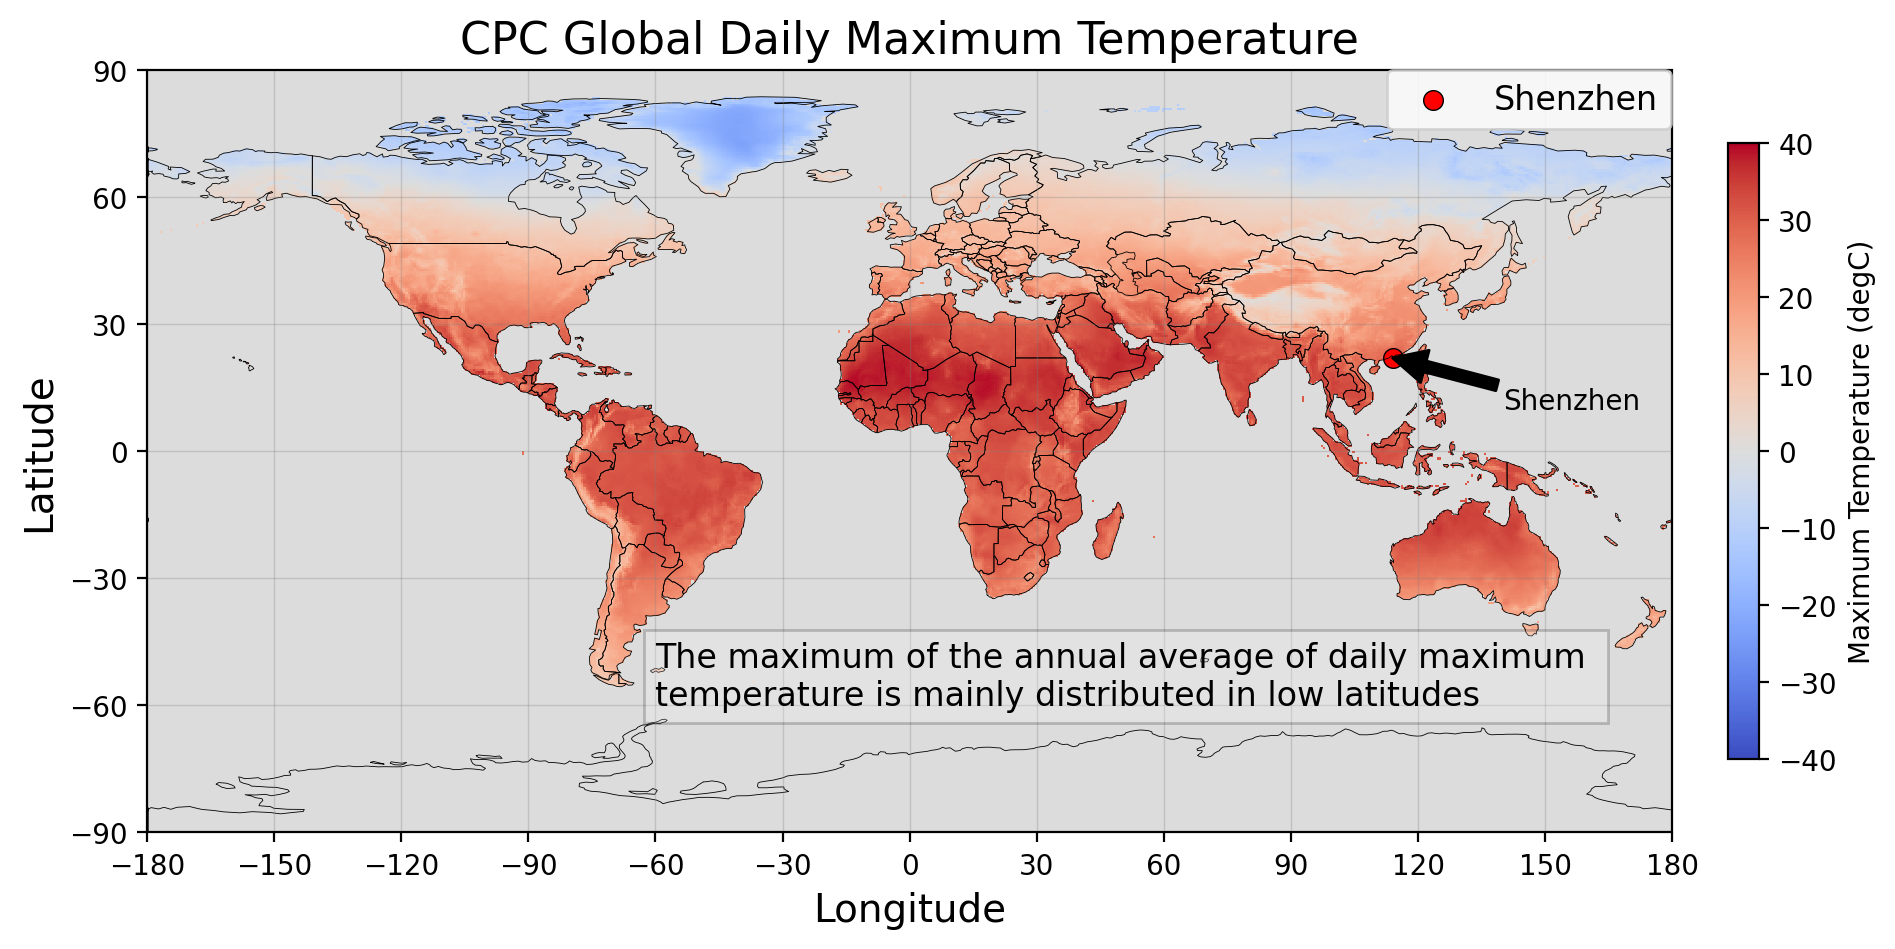

In [8]:
#2.1

# 1.project
Tmax = ds.tmax.mean(dim='time')
Tmax_1=Tmax.fillna(0)
plt.figure(figsize=(12,10), dpi=200)
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# 2.masks and feature
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1) 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.3))

# 3.colorbar
Tmax_1.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=-40, vmax=40, cmap='coolwarm',
            cbar_kwargs={'shrink':0.4,'pad':0.03,'label':'Maximum Temperature (degC)'})


# 4. x label and ticks
plt.xticks(ticks=np.linspace(-180, 180, 13), fontsize=10)
plt.xlabel('Longitude',fontsize=14)

# 5. y label and ticks
plt.yticks(ticks=np.linspace(-90, 90, 7), fontsize=10)
plt.ylabel('Latitude',fontsize=14)

# 6.title
plt.title('CPC Global Daily Maximum Temperature',fontsize=16)

# 7.gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, 
                  color='gray', alpha=0.3)
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 30))

# 8.legend
plt.scatter(114,22,c='red',s=50,marker='o',label='Shenzhen',
            edgecolors='k', linewidths=0.5)
plt.legend(fontsize=12,loc=4, bbox_to_anchor=(1.01,0.9))

# 9.annotations
ax.annotate('Shenzhen', xy=(114, 22), xytext=(140, 10), 
            fontsize=10,arrowprops=dict(facecolor='black'))

# 10.text box   参考网站：https://zhuanlan.zhihu.com/p/205110001
plt.text(-60,-60, 'The maximum of the annual average of daily maximum \ntemperature is mainly distributed in low latitudes', 
         fontsize=12,
         bbox={'facecolor': 'white', #填充色
              'edgecolor':'k',       #外框色
               'alpha': 0.2,         #框透明度
               'pad': 4})             #本文与框周围距离               
plt.show()

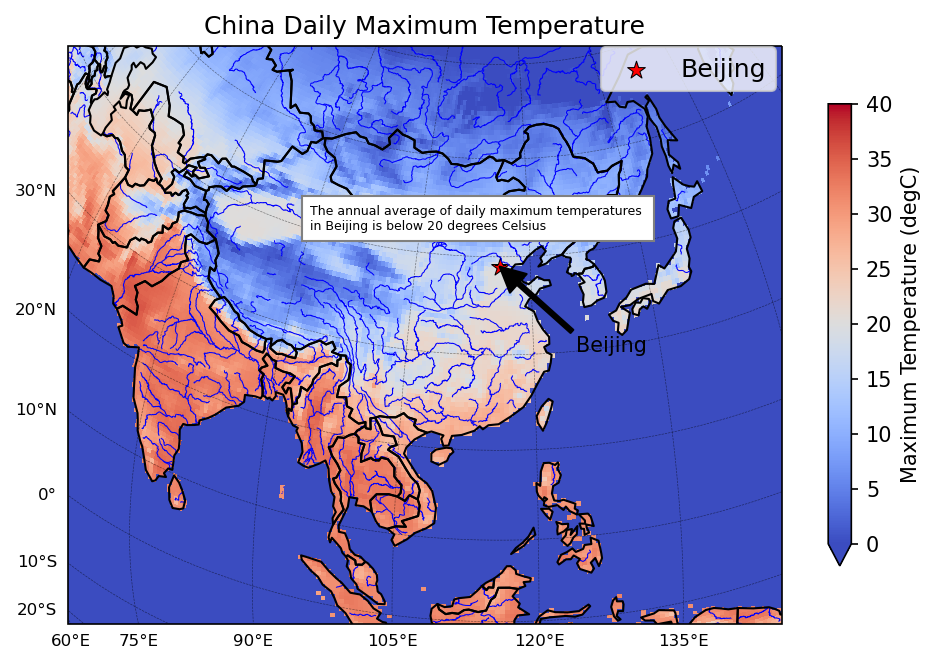

In [10]:
# 2.2

# 经纬度转化参考：https://zhuanlan.zhihu.com/p/372821243

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# 1.project  经纬度范围为中国地区
Tmax = ds.tmax.mean(dim='time')
Tmax_1=Tmax.fillna(0)
plt.figure(figsize=(10,5), dpi=150)
central_lon, central_lat = 116,39
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)
extent = [central_lon-50, central_lon+30, central_lat-40, central_lat+15]
ax.set_extent(extent)

# 2.masks and feature
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
ax.add_feature(cfeature.OCEAN,facecolor='gray', alpha=0.3)
ax.add_feature(rivers, facecolor='None', edgecolor='b', linewidth=0.5)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=1))

# 3.colorbar
Tmax_1.plot(ax=ax, transform=ccrs.PlateCarree(),vmin=0, vmax=40, cmap='coolwarm',
            cbar_kwargs={'shrink':0.8,'pad':0.04,'label':'Maximum Temperature (degC)'})

# 4.title
plt.title('China Daily Maximum Temperature',fontsize=12)

# 5.gridlines
gl=ax.gridlines(draw_labels=True,crs=ccrs.PlateCarree(),
                linestyle="--",linewidth=0.3,color='k',alpha=0.5)


# 6. x label and ticks
gl.top_labels=False  #关闭顶部经纬度标签                                  
gl.xformatter = LONGITUDE_FORMATTER  #使横纵坐标转化为经纬度格式                                              
gl.xlocator=mticker.FixedLocator(np.arange(-180,181,15))  #设置横纵坐标范围及刻度      
gl.xlabel_style={'size':8}    # 修改字体大小                      


# 7. y label and ticks
gl.right_labels=False
gl.yformatter = LATITUDE_FORMATTER   
gl.ylocator=mticker.FixedLocator(np.arange(-90,91,10))   
gl.ylabel_style={'size':8}

# 8.legend
ax.scatter(116,39,s=80,c='r',marker='*',label='Beijing',edgecolors='k', linewidths=0.5)
plt.legend(fontsize=12,loc=4, bbox_to_anchor=(1.01,0.9))

# 9.annotations
ax.annotate('Beijing', xy=(116,39), xytext=(125, 30), 
            fontsize=10,arrowprops=dict(facecolor='black',width=2),
            transform=ccrs.PlateCarree())

# 10. text box
plt.text(90,40,'The annual average of daily maximum temperatures \nin Beijing is below 20 degrees Celsius', 
         fontsize=6,
         bbox={'facecolor': 'white', 'edgecolor':'gray', 'alpha': 1, 'pad': 4,},transform=ccrs.PlateCarree())

plt.show()